In [1]:
#pip install --user logomaker #uncomment if logomaker is not currently installed.
import logomaker

Running /home/blacksmi/.local/lib/python3.9/site-packages/logomaker/examples/demo_fig1b.py:
-------------------------------------------------------------
# do imports
import matplotlib.pyplot as plt
import logomaker as logomaker

# load crp energy matrix
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)

# create Logo object
crp_logo = logomaker.Logo(crp_df,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo.fig.show()
--------

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.
<string>:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


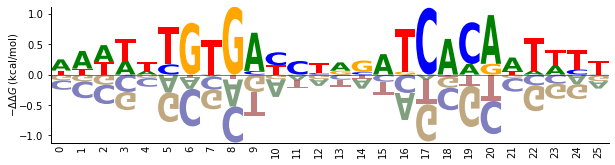

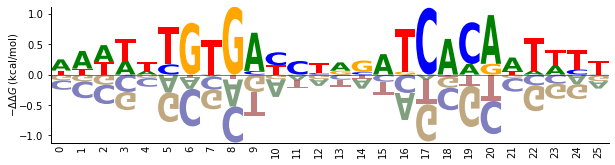

In [2]:
logomaker.demo('fig1b')


Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



/tmp/ipykernel_2195066/2982766283.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  crp_logo.fig.show()


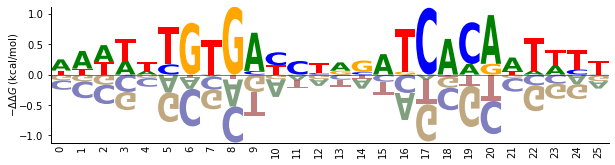

In [5]:
# do imports
import matplotlib.pyplot as plt
import logomaker as logomaker

# load crp energy matrix
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=True)

# create Logo object
crp_logo = logomaker.Logo(crp_df,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo.fig.show()

In [4]:
print(crp_df)

            A         C         G         T
pos                                        
0    0.183642 -0.155864 -0.094136  0.066358
1    0.290123 -0.277778 -0.111111  0.098765
2    0.276235 -0.316358 -0.168210  0.208333
3    0.226852 -0.285494 -0.297840  0.356481
4    0.060185 -0.143519 -0.057099  0.140432
5   -0.294753  0.168210 -0.486111  0.612654
6   -0.179012 -0.617284  0.851852 -0.055556
7   -0.033951 -0.212963 -0.324074  0.570988
8   -0.444444 -0.592593  1.117284 -0.080247
9    0.628086  0.060185 -0.285494 -0.402778
10  -0.291667  0.214506 -0.075617  0.152778
11  -0.091049  0.223765 -0.004630 -0.128086
12  -0.111111  0.024691 -0.074074  0.160494
13   0.137346 -0.084877  0.063272 -0.115741
14  -0.162037  0.041667  0.189815 -0.069444
15   0.336420 -0.114198 -0.003086 -0.219136
16  -0.444444 -0.302469  0.049383  0.697531
17  -0.080247  1.098765 -0.611111 -0.407407
18   0.586420 -0.370370 -0.179012 -0.037037
19   0.174383  0.686728 -0.677469 -0.183642
20   0.800926 -0.544753  0.17746

Text(0, 0.5, 'probability')

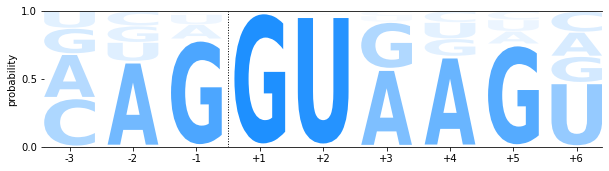

In [26]:
# load ss probability matrix
ss_df = logomaker.get_example_matrix('ss_probability_matrix',
print_description=False)
# create Logo object
ss_logo = logomaker.Logo(ss_df,
width=.8,
vpad=.05,
fade_probabilities=True,
stack_order='small_on_top',
color_scheme='dodgerblue')
# style using Logo methods
ss_logo.style_spines(spines=['left', 'right'], visible=False)
# style using Axes methods
ss_logo.ax.set_xticks(range(len(ss_df)))
ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_yticks([0, .5, 1])
ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('probability')


In [27]:
ss_df

,A,C,G,U
pos,,,,
0,0.324656,0.358980,0.189313,0.127051
1,0.628560,0.110845,0.120658,0.139936
2,0.105337,0.027597,0.794143,0.072923
3,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.028156,0.000000,0.971844
5,0.572633,0.038576,0.347800,0.040991
6,0.666476,0.085075,0.128766,0.119683
7,0.092191,0.065904,0.757889,0.084016
8,0.177637,0.156259,0.193662,0.472442


In [4]:
#Actual code here:
import sys
import pandas as pd
def process_locus_info(locus_info):
    #print(locus_info)
    locus_dict = {}
    
    locus_dict["chromosome"] = locus_info[0]
    locus_dict["start"] = int(locus_info[1])
    locus_dict["end"] = int(locus_info[2])
    locus_dict["orientation"] = locus_info[3]
    locus_dict["parent_gene"] = locus_info[4]
    locus_dict["poly_a_coords"] = locus_info[5]
    locus_dict["poly_a_seq"] = locus_info[6]
    locus_dict["left_TSD_coords"] = locus_info[7]
    locus_dict["left_TSD_seq"] = locus_info[8]
    locus_dict["right_TSD_coords"] = locus_info[9]
    locus_dict["right_TSD_seq"] = locus_info[10]
    locus_dict["endo_site"] = locus_info[12]
    
    return locus_dict
    
#First, extract the locus information:
def generate_logoplot(infile_name, sample_name,datatype=["Standard"]):
    #import_file = "/home/blacksmi/links/kidd-lab/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2023_12_14/zoey/Retrogene_Output_dist_70.txt"
    endo_cut_site = []
    with open(infile_name, 'rt') as infile:
        for line in infile:
            line = line.rstrip().split()
            line_dict = process_locus_info(line)
            if line_dict["endo_site"] == "N/A":
                continue
            if "Standard" in datatype:
                    pass
            if "Long_TSD" in datatype:
                if len(line_dict["right_TSD_seq"]) < 10 or len(line_dict["left_TSD_seq"]) < 10:
                    continue
                #else:
                #    print(line)
            if "Both_Hallmarks" in datatype or "Agree" in datatype:
                if line_dict["right_TSD_seq"] == "N/A" or line_dict["poly_a_seq"] == "N/A":
                    continue
            if "Agree" in datatype:
                if line_dict["orientation"]  == "+":
                    poly_a_end = int(line_dict["poly_a_coords"].split("-")[1])
                    TSD_start = int(line_dict["right_TSD_coords"].split("-")[0].split(":")[1])
                    dist = TSD_start - poly_a_end -1
                    #print(line,poly_a_end,TSD_start)
                    #sys.exit()
                elif line_dict["orientation"]  == "-":
                    poly_a_start = int(line_dict["poly_a_coords"].split("-")[0].split(":")[1])
                    TSD_end = int(line_dict["left_TSD_coords"].split("-")[1])
                    dist = poly_a_start - TSD_end -1
                    #print(line,poly_a_start,TSD_end)
                    #sys.exit()
                if dist > 5:
                    continue
            endo_cut_site.append(line[-1])
    #print(endo_cut_site)
    endo_dict = {}
    for i in range(len(endo_cut_site[0])):
        endo_dict[i] = {"A":0,"T":0,"C":0,"G":0}
    #print(endo_dict)
    for cut_site in endo_cut_site:
        cut_site = cut_site.upper()
        for i in range(len(cut_site)):
            endo_dict[i][cut_site[i]] +=1
            if endo_dict[i][cut_site[i]] == "N":
                sys.exit()
    for key in endo_dict.keys():
        #print(endo_dict[key])
        for key2 in endo_dict[key].keys():
            #print(key2)
            endo_dict[key][key2] = endo_dict[key][key2]/len(endo_cut_site)
    endo_dict
    endo_pd = pd.DataFrame(endo_dict)
    endo_pd = endo_pd.T
    print(endo_pd)
    print(len(endo_cut_site))
    # create Logo object
    ss_logo = logomaker.Logo(endo_pd,
    width=.8,
    vpad=.05,
    #fade_probabilities=True,
    stack_order='big_on_top',
    color_scheme='classic')
    # style using Logo methods
    ss_logo.style_spines(spines=['left', 'right'], visible=False)
    # style using Axes methods
    ss_logo.ax.set_xticks(range(len(endo_pd)))
    ss_logo.ax.set_xticklabels('%+d'%x for x in [-5, -4, -3, -2, -1, +1, +2])
    ss_logo.ax.set_yticks([0,.2,.4,.6,.8, 1])
    ss_logo.ax.axvline(4.5, color='k', linewidth=1, linestyle=':')
    ss_logo.ax.set_ylabel('probability')
    ss_logo.ax.set_xlabel(f'{sample_name}. {datatype}. N={len(endo_cut_site)}')

          A         T         C         G
0  0.304206  0.376072  0.166190  0.153532
1  0.300122  0.422621  0.141282  0.135974
2  0.273581  0.427521  0.167007  0.131891
3  0.245815  0.442221  0.167824  0.144140
4  0.281748  0.417722  0.125766  0.174765
5  0.398530  0.231115  0.169457  0.200898
6  0.385055  0.317681  0.149857  0.147407
2449
          A         T         C         G
0  0.298755  0.434025  0.141079  0.126141
1  0.265560  0.531950  0.110373  0.092116
2  0.214938  0.538589  0.151037  0.095436
3  0.172614  0.563485  0.160996  0.102905
4  0.249793  0.502905  0.102075  0.145228
5  0.513693  0.189212  0.131120  0.165975
6  0.465560  0.322822  0.111203  0.100415
1205
          A         T         C         G
0  0.246560  0.441514  0.183486  0.128440
1  0.220183  0.542431  0.149083  0.088303
2  0.188073  0.569954  0.166284  0.075688
3  0.158257  0.600917  0.149083  0.091743
4  0.229358  0.560780  0.098624  0.111239
5  0.447248  0.175459  0.160550  0.216743
6  0.411697  0.339450  0

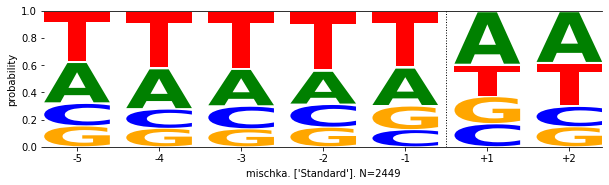

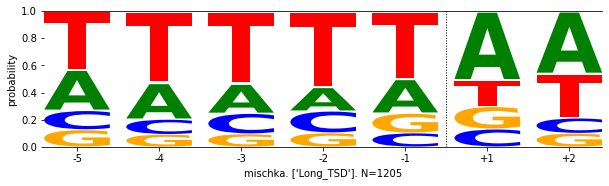

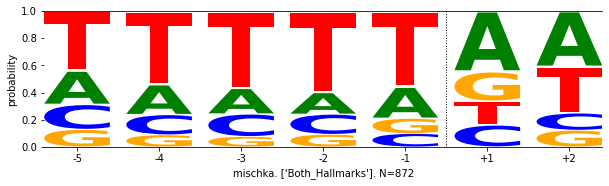

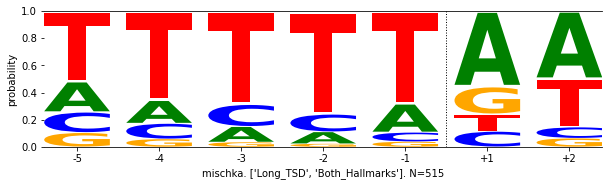

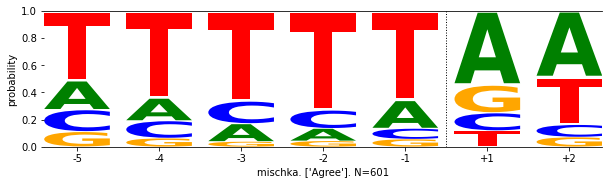

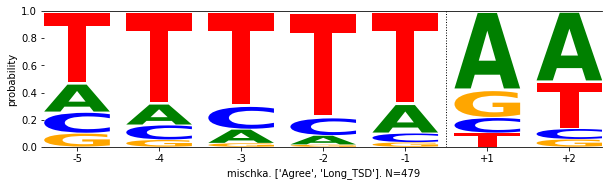

In [5]:
sample = 'mischka'
import_file = "/home/blacksmi/links/kidd-lab/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2023_12_14/mischka/Retrogene_Output_dist_70.txt"
generate_logoplot(import_file,sample)
generate_logoplot(import_file,sample,["Long_TSD"])
generate_logoplot(import_file,sample,["Both_Hallmarks"])
generate_logoplot(import_file,sample,["Long_TSD","Both_Hallmarks"])
generate_logoplot(import_file,sample,["Agree"])
generate_logoplot(import_file,sample,["Agree","Long_TSD"])

          A         T         C         G
0  0.282609  0.478261  0.130435  0.108696
1  0.304348  0.543478  0.086957  0.065217
2  0.195652  0.521739  0.217391  0.065217
3  0.130435  0.608696  0.152174  0.108696
4  0.260870  0.500000  0.086957  0.152174
5  0.586957  0.108696  0.065217  0.239130
6  0.456522  0.347826  0.086957  0.108696
46
          A         T         C         G
0  0.277778  0.500000  0.111111  0.111111
1  0.250000  0.611111  0.083333  0.055556
2  0.138889  0.611111  0.194444  0.055556
3  0.055556  0.722222  0.138889  0.083333
4  0.250000  0.555556  0.083333  0.111111
5  0.583333  0.055556  0.083333  0.277778
6  0.527778  0.333333  0.055556  0.083333
36
          A         T         C         G
0  0.136364  0.681818  0.090909  0.090909
1  0.181818  0.681818  0.136364  0.000000
2  0.090909  0.727273  0.181818  0.000000
3  0.000000  0.909091  0.090909  0.000000
4  0.227273  0.681818  0.045455  0.045455
5  0.681818  0.045455  0.090909  0.181818
6  0.500000  0.454545  0.045

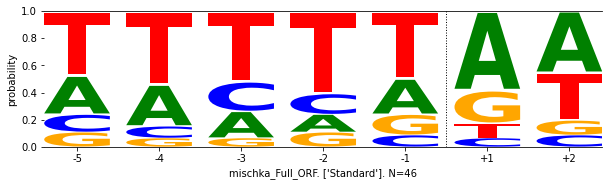

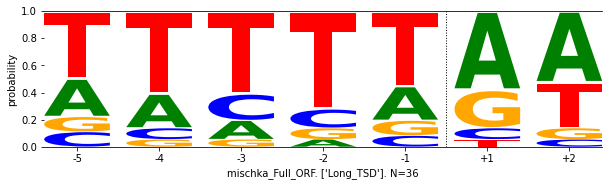

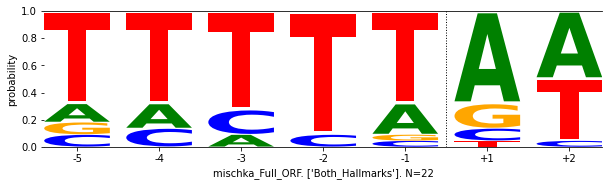

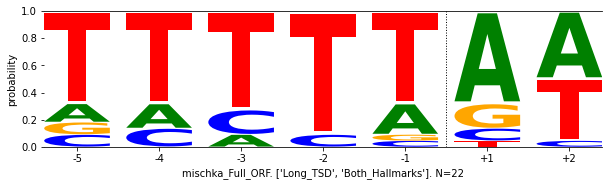

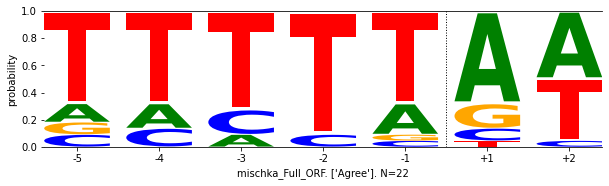

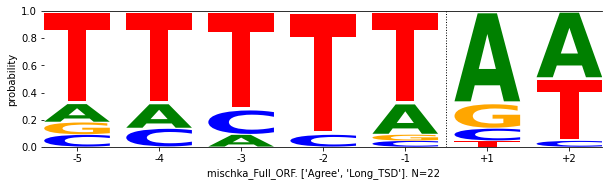

In [8]:
sample = 'mischka_Full_ORF'
import_file = "/home/blacksmi/links/kidd-lab/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Full_ORF_Loci/mischka_Retrogene_Output_dist_70.txt"
generate_logoplot(import_file,sample)
generate_logoplot(import_file,sample,["Long_TSD"])
generate_logoplot(import_file,sample,["Both_Hallmarks"])
generate_logoplot(import_file,sample,["Long_TSD","Both_Hallmarks"])
generate_logoplot(import_file,sample,["Agree"])
generate_logoplot(import_file,sample,["Agree","Long_TSD"])